<a href="https://colab.research.google.com/github/HinePo/Face-Eye-and-Smile-detection/blob/main/Face%2C_Eye_and_Smile_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Face, Eye, Smile detection

Using OpenCV and Haar-Cascade pre-trained models (frontal face, eye and smile).


# References
- https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_objdetect/py_face_detection/py_face_detection.html
- https://stackoverflow.com/questions/30508922/error-215-empty-in-function-detectmultiscale
- https://www.geeksforgeeks.org/python-smile-detection-using-opencv/

In [13]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

In [52]:
# load models
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
smile_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_smile.xml')

# Example 1

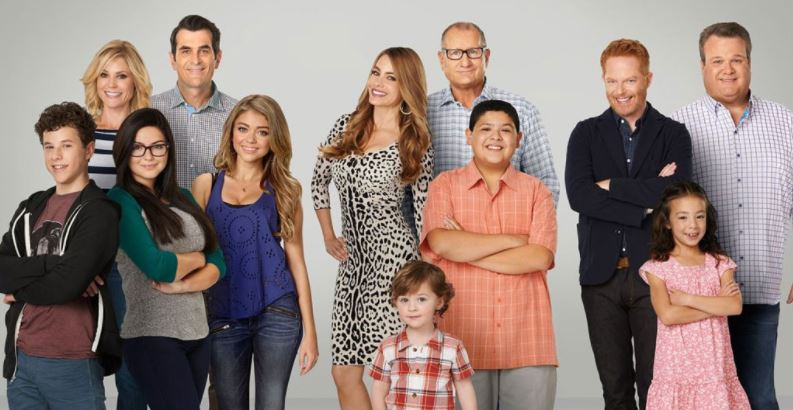

In [55]:
img = cv2.imread('/content/family.JPG') # load image or video
cv2_imshow(img)

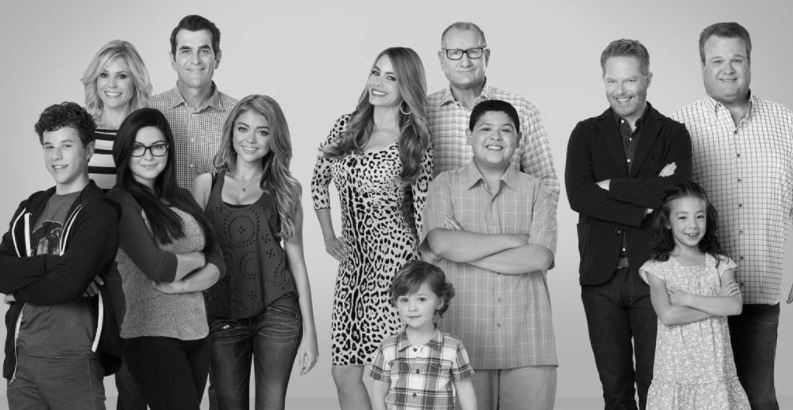

In [56]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # convert to gray scale
cv2_imshow(gray)

In [57]:
# detect
faces = face_cascade.detectMultiScale(gray, 1.3, 5)

# draw bounding boxes for each face detected
for (x,y,w,h) in faces:
    img = cv2.rectangle(img, (x,y), (x + w, y + h), (255,0,0), 2)
    roi_gray = gray[y:y+h, x:x+w] # roi: region of interest
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

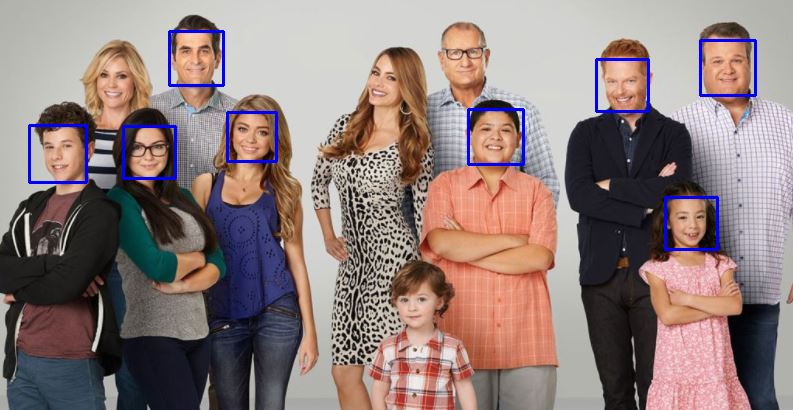

In [58]:
cv2_imshow(img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

No eyes or smiles were detected in the picture above, only some frontal faces...

# Exemple 2

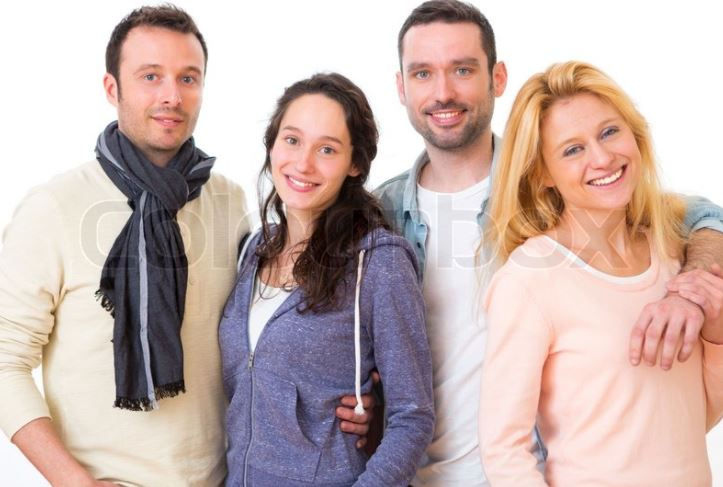

In [53]:
img = cv2.imread('/content/people.JPG') # load image or video
cv2_imshow(img)

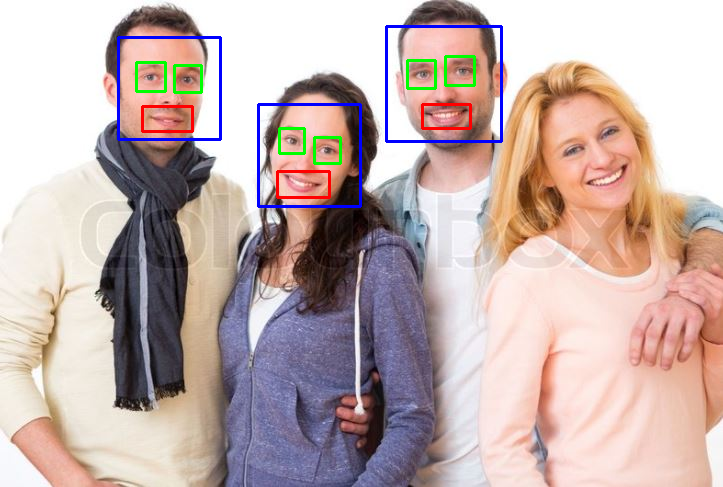

In [54]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # convert to gray scale

# detect
faces = face_cascade.detectMultiScale(gray, 1.3, 5)

# draw bounding boxes for each face detected
for (x,y,w,h) in faces:
    img = cv2.rectangle(img, (x,y), (x + w, y + h), (255,0,0), 2)
    roi_gray = gray[y:y+h, x:x+w] # roi: region of interest
    roi_color = img[y:y+h, x:x+w]

    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
      cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

    smiles = smile_cascade.detectMultiScale(roi_gray)
    for (sx, sy, sw, sh) in smiles:
      cv2.rectangle(roi_color, (sx, sy), ((sx + sw), (sy + sh)), (0, 0, 255), 2)

cv2_imshow(img)

Accuracies are better for this resolution/picture.